# Disclaimer

Ini adalah mini project yang diberikan oleh [Academy DQLab](https://dqlab.id).

Dalam kasus ini, perusahaan membutuhkan perbandingan performa dari setiap cabang di berbagai kota. Ambil lima (5) kota terbesar di Pulau Jawa untuk dianalisis dari segi order size, customer count, product count, brand count, dan GMV dalam basis bulanan.

Dataset yang diberikan adalah data bersih dari performa cabang perusahaan pada tahun 2019.


## Data Penjualan di Setiap Cabang
- Diberikan 4 csv files yang isinya retail data untuk tiap Quarter:
    - csv (data dari bulan January - March) --> [here](https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/LO4/retail_data_from_1_until_3.csv)
    - csv (data dari bulan April - June) --> [here](https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/LO4/retail_data_from_4_until_6.csv)
    - csv (data dari bulan July - September) --> [here](https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/LO4/retail_data_from_7_until_9.csv)
    - csv (data dari bulan October - December) --> [here](https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/LO4/retail_data_from_10_until_12.csv)
- Goal : Automation untuk pembuatan grafik dari measurement yang dibutuhkan.   

## Step by step

1. Load masing-masing data *.csv dengan Pandas   
2. Pengecekan dan Transformasi Data 
    - Cek data sekilas (melihat bentuk data biasanya 5 data teratas)
    - Cek list kolom untuk semua dataframe apakah seluruh kolom dari keempat dataframe yang terpisah itu sama
    - Jika sama digabungkan.
    - Cek informasi dataframe yang telah digabungkan
    - Statistik deskriptif dari dataframe yang telah digabungkan.   
3. Transformasi Data 
    - Jika ada data yang tidak seharusnya maka dapat dibuang
    - Jika ada kolom yang seharusnya bertipe datetime64 ubahlah
    - Cek kembali informasi dataframe 
    - Tampilkan kembali statistik deskriptif dari dataframe
4. Filter province yang hanya termasuk 5 provinsi besar di Jawa (DKI Jakarta, Jawa Barat, Jawa Tengah, Jawa Timur, dan Yogyakarta)
5. Mengelompokkan data berdasarkan order_date dan province yang sudah difilter dan menghitung order unique count, customer unique count, product unique count, brand unique count, dan GMV (Gross Merchandise Volume = total_price untuk semua penjualan)
6. Melakukan unstack untuk mendapatkan order_date di bagian baris dan province di bagian column
7. Slicing data untuk masing-masing measurement (kolom), misal: kolom order
8. Lakukan resampling pada data tersebut untuk dilakukan perhitungan secara bulanan
9. Plot untuk hasil resampling
10. Membuat sebuah perulangan dengan dataframe 'unstack_city_province' yang digunakan (hasil dari langkah ke 5)



In [2]:
# import library
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Load masing-masing data
retail_Q1 = pd.read_csv('data/retail_data_from_1_until_3.csv', low_memory=False)
retail_Q2 = pd.read_csv('data/retail_data_from_4_until_6.csv', low_memory=False)
retail_Q3 = pd.read_csv('data/retail_data_from_7_until_9.csv', low_memory=False)
retail_Q4 = pd.read_csv('data/retail_data_from_10_until_12.csv', low_memory=False)

In [8]:
# Cek data sekilas (tampilkan 5 baris teratas)
retail_Q1.head()

,Unnamed: 0,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,total_price
0,0,1612339,2019-01-01,18055,Jakarta Selatan,DKI Jakarta,P0648,BRAND_C,4,1934000,7736000
1,1,1612339,2019-01-01,18055,Jakarta Selatan,DKI Jakarta,P3826,BRAND_V,8,604000,4832000
2,2,1612339,2019-01-01,18055,Jakarta Selatan,DKI Jakarta,P1508,BRAND_G,12,747000,8964000
3,3,1612339,2019-01-01,18055,Jakarta Selatan,DKI Jakarta,P0520,BRAND_B,12,450000,5400000
4,4,1612339,2019-01-01,18055,Jakarta Selatan,DKI Jakarta,P1513,BRAND_G,3,1500000,4500000


In [9]:
# Cek list kolom untuk semua dataframe
print('Kolom retail_data1: %s' %retail_Q1.columns)
print('Kolom retail_data2: %s' %retail_Q2.columns)
print('Kolom retail_data3: %s' %retail_Q3.columns)
print('Kolom retail_data4: %s' %retail_Q4.columns)

Kolom retail_data1: Index(['Unnamed: 0', 'order_id', 'order_date', 'customer_id', 'city',
       'province', 'product_id', 'brand', 'quantity', 'item_price',
       'total_price'],
      dtype='object')
Kolom retail_data2: Index(['Unnamed: 0', 'order_id', 'order_date', 'customer_id', 'city',
       'province', 'product_id', 'brand', 'quantity', 'item_price',
       'total_price'],
      dtype='object')
Kolom retail_data3: Index(['Unnamed: 0', 'order_id', 'order_date', 'customer_id', 'city',
       'province', 'product_id', 'brand', 'quantity', 'item_price',
       'total_price'],
      dtype='object')
Kolom retail_data4: Index(['Unnamed: 0', 'order_id', 'order_date', 'customer_id', 'city',
       'province', 'product_id', 'brand', 'quantity', 'item_price',
       'total_price'],
      dtype='object')


In [37]:
# Concat multiple dataframe menjadi 1 dataframe
retail_table = pd.concat([retail_Q1, retail_Q2, retail_Q3, retail_Q4])
print('\nJumlah baris:', retail_table.shape[0])


Jumlah baris: 508557


In [38]:
# Pengecekan dataframe info
print('\nInfo:')
print(retail_table.info())


Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 508557 entries, 0 to 201825
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   508557 non-null  int64 
 1   order_id     508557 non-null  object
 2   order_date   508557 non-null  object
 3   customer_id  508557 non-null  int64 
 4   city         508557 non-null  object
 5   province     508557 non-null  object
 6   product_id   508557 non-null  object
 7   brand        508557 non-null  object
 8   quantity     508557 non-null  int64 
 9   item_price   508557 non-null  int64 
 10  total_price  508557 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 46.6+ MB
None


In [39]:
# Pengecekan statistik deskriptif
print('\nStatistik deskriptif:\n', retail_table.describe())


Statistik deskriptif:
           Unnamed: 0    customer_id       quantity    item_price   total_price
count  508557.000000  508557.000000  508557.000000  5.085570e+05  5.085570e+05
mean    71004.479982   11509.957582      10.571326  1.357347e+06  7.043305e+06
std     49737.328863    6758.489806     112.805119  1.481544e+07  5.135112e+07
min         0.000000       0.000000       1.000000 -3.871709e+09 -3.871709e+09
25%     31784.000000   12370.000000       1.000000  4.500000e+05  1.356000e+06
50%     63569.000000   14388.000000       4.000000  7.400000e+05  3.498000e+06
75%     95509.000000   16261.000000      11.000000  1.458000e+06  6.270000e+06
max    201825.000000   18287.000000   74215.000000  4.739478e+09  2.790484e+10


In [40]:
# Transformasi Data
# Memastikan data yang memiliki item_price < 0 atau total_price < 0
cek = retail_table.loc[(retail_table['item_price'] < 0) | retail_table['total_price'] < 0]
cek

,Unnamed: 0,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,total_price


In [41]:
# Jika tidak masuk akal datanya dapat dibuang
if cek.shape[0] != 0:
    retail_table = retail_table.loc[(retail_table['item_price'] > 0) & (retail_table['total_price'] > 0)]

# Cek apakah masih ada order_id yang bernilai undefined dan delete row tersebut
cek = retail_table.loc[retail_table['order_id'] == 'undefined']
cek

,Unnamed: 0,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,total_price
83663,83663,undefined,2019-09-06,0,unknown,unknown,P0153,BRAND_A,1,3871733000,3871733000
83664,83664,undefined,2019-09-06,0,unknown,unknown,P0153,BRAND_A,1,-3871709000,-3871709000
83665,83665,undefined,2019-09-06,0,unknown,unknown,P0153,BRAND_A,1,-3871709000,-3871709000


In [42]:
# Jika ada maka buang baris tersebut
if cek.shape[0] != 0:
    retail_table = retail_table.loc[retail_table['order_id'] != 'undefined']

In [43]:
# Transform order_id menjadi int64
retail_table['order_id'] = retail_table['order_id'].astype('int64')

In [44]:
# Transform order_date menjadi datetime Pandas
retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])

In [51]:
# Cek dataframe kembali untuk memastikan
retail_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508554 entries, 0 to 201825
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Unnamed: 0   508554 non-null  int64         
 1   order_id     508554 non-null  int64         
 2   order_date   508554 non-null  datetime64[ns]
 3   customer_id  508554 non-null  int64         
 4   city         508554 non-null  object        
 5   province     508554 non-null  object        
 6   product_id   508554 non-null  object        
 7   brand        508554 non-null  object        
 8   quantity     508554 non-null  int64         
 9   item_price   508554 non-null  int64         
 10  total_price  508554 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 46.6+ MB


In [52]:
# Cek statistik deskriptif kembali, untuk memastikan
retail_table.describe()

,Unnamed: 0,order_id,customer_id,quantity,item_price,total_price
count,508554.000000,5.085540e+05,508554.000000,508554.000000,5.085540e+05,5.085540e+05
mean,71004.405302,1.680676e+06,11510.025480,10.571383,1.364968e+06,7.050960e+06
std,49737.466061,3.865433e+04,6758.451924,112.805449,1.144767e+07,5.048185e+07
min,0.000000,1.612339e+06,0.000000,1.000000,1.200000e+04,1.200000e+04
25%,31784.000000,1.646143e+06,12370.000000,1.000000,4.500000e+05,1.356000e+06
50%,63569.000000,1.682617e+06,14388.000000,4.000000,7.400000e+05,3.498000e+06
75%,95509.750000,1.714960e+06,16261.000000,11.000000,1.458000e+06,6.270000e+06
max,201825.000000,1.742998e+06,18287.000000,74215.000000,4.739478e+09,2.790484e+10


In [56]:
# Filter hanya 5 province terbesar di pulau Jawa
print('\nFILTER 5 PROVINCE TERBESAR DI PULAU JAWA\n')
java = ['DKI Jakarta','Jawa Barat','Jawa Tengah','Jawa Timur','Yogyakarta']
retail_table = retail_table.loc[retail_table['province'].isin(java)]

# Untuk memastikan kolom provinsi isinya sudah sama dengan java
print(retail_table['province'].unique())


FILTER 5 PROVINCE TERBESAR DI PULAU JAWA

['DKI Jakarta' 'Jawa Barat' 'Jawa Timur' 'Yogyakarta' 'Jawa Tengah']


In [57]:
#Kelompokkan sesuai dengan order_date dan province kemudian aggregasikan
groupby_city_province = retail_table.groupby(['order_date','province']).agg({
   'order_id': 'nunique',
   'customer_id': 'nunique',
   'product_id': 'nunique',
   'brand': 'nunique',
   'total_price': sum
})

In [58]:
groupby_city_province

order_id  customer_id  product_id  brand  total_price
order_date province                                                          
2019-01-01 DKI Jakarta        34           33         328     22   4717083000
           Jawa Barat         11            9         136     18   1557289000
           Jawa Tengah         4            4         116     20    352052000
           Jawa Timur          6            6          83     15   1106603000
           Yogyakarta          7            4          88     16   9454007000
...                          ...          ...         ...    ...          ...
2019-12-31 DKI Jakarta        55           53         854     24   7761539000
           Jawa Barat         12           11         186     21   1148204000
           Jawa Tengah        10            8         113     17   2017737000
           Jawa Timur         11           10         279     23   3115149000
           Yogyakarta          9            8          90     19    728770000

[1455 rows x 5 columns]

In [59]:
# Ubah nama kolomnya menjadi 'order','customer','product','brand','GMV'
groupby_city_province.columns = ['order','customer','product','brand','GMV']
groupby_city_province.head(10)

order  customer  product  brand         GMV
order_date province                                                
2019-01-01 DKI Jakarta     34        33      328     22  4717083000
           Jawa Barat      11         9      136     18  1557289000
           Jawa Tengah      4         4      116     20   352052000
           Jawa Timur       6         6       83     15  1106603000
           Yogyakarta       7         4       88     16  9454007000
2019-01-02 DKI Jakarta     58        50      590     25  6218886000
           Jawa Barat      17        14      246     21  1458207000
           Jawa Tengah      8         7       67     18   968273000
           Jawa Timur       6         6       69     17   901676000
           Yogyakarta      12        12      238     23  1509057000

In [60]:
# Unstack untuk mendapatkan order_date di bagian baris dan province di bagian column
unstack_city_province = groupby_city_province.unstack('province').fillna(0)
unstack_city_province.head()

order                                               \
province   DKI Jakarta Jawa Barat Jawa Tengah Jawa Timur Yogyakarta   
order_date                                                            
2019-01-01        34.0       11.0         4.0        6.0        7.0   
2019-01-02        58.0       17.0         8.0        6.0       12.0   
2019-01-03        43.0       13.0         8.0        8.0       10.0   
2019-01-04        39.0        9.0        11.0        2.0        3.0   
2019-01-06        22.0        9.0         3.0        4.0        2.0   

              customer                                               ...  \
province   DKI Jakarta Jawa Barat Jawa Tengah Jawa Timur Yogyakarta  ...   
order_date                                                           ...   
2019-01-01        33.0        9.0         4.0        6.0        4.0  ...   
2019-01-02        50.0       14.0         7.0        6.0       12.0  ...   
2019-01-03        40.0       13.0         7.0        6.0        9.0  ...   
2019-01-04        25.0        7.0         9.0        2.0        3.0  ...   
2019-01-06        22.0        9.0         3.0        3.0        2.0  ...   

                 brand                                               \
province   DKI Jakarta Jawa Barat Jawa Tengah Jawa Timur Yogyakarta   
order_date                                                            
2019-01-01        22.0       18.0        20.0       15.0       16.0   
2019-01-02        25.0       21.0        18.0       17.0       23.0   
2019-01-03        23.0       22.0        18.0       18.0       23.0   
2019-01-04        24.0       18.0        17.0       14.0       19.0   
2019-01-06        25.0       23.0        10.0       19.0       12.0   

                     GMV                                           \
province     DKI Jakarta    Jawa Barat  Jawa Tengah    Jawa Timur   
order_date                                                          
2019-01-01  4.717083e+09  1.557289e+09  352052000.0  1.106603e+09   
2019-01-02  6.218886e+09  1.458207e+09  968273000.0  9.016760e+08   
2019-01-03  4.670172e+09  1.797040e+09  663258000.0  1.189519e+09   
2019-01-04  6.724529e+09  1.805267e+09  710456000.0  2.418780e+08   
2019-01-06  2.483318e+09  1.558771e+09  308975000.0  2.157180e+08   

                          
province      Yogyakarta  
order_date                
2019-01-01  9.454007e+09  
2019-01-02  1.509057e+09  
2019-01-03  1.582902e+09  
2019-01-04  5.945680e+08  
2019-01-06  1.221680e+08  

[5 rows x 25 columns]

In [71]:
# Slicing data untuk masing-masing measurement, misal: order
idx = pd.IndexSlice['order']
by_order = unstack_city_province.loc[:,idx]
print('\nby order (5 data teratas):\n', by_order.head())


by order (5 data teratas):
 province    DKI Jakarta  Jawa Barat  Jawa Tengah  Jawa Timur  Yogyakarta
order_date                                                              
2019-01-01         34.0        11.0          4.0         6.0         7.0
2019-01-02         58.0        17.0          8.0         6.0        12.0
2019-01-03         43.0        13.0          8.0         8.0        10.0
2019-01-04         39.0         9.0         11.0         2.0         3.0
2019-01-06         22.0         9.0          3.0         4.0         2.0


In [72]:
# Lakukan resampling pada data tersebut untuk dilakukan perhitungan rata-rata bulanan 
by_order_monthly_mean = by_order.resample('M').mean()
print('\nby_order_monthly_mean (5 data teratas):\n', by_order_monthly_mean.head())


by_order_monthly_mean (5 data teratas):
 province    DKI Jakarta  Jawa Barat  Jawa Tengah  Jawa Timur  Yogyakarta
order_date                                                              
2019-01-31    27.222222   10.500000     5.111111    3.500000    4.555556
2019-02-28    19.083333    7.458333     3.250000    3.208333    2.833333
2019-03-31    18.576923    6.615385     3.615385    3.192308    3.038462
2019-04-30    22.923077    8.000000     4.038462    3.730769    3.807692
2019-05-31    27.318182    9.181818     4.318182    5.181818    5.000000


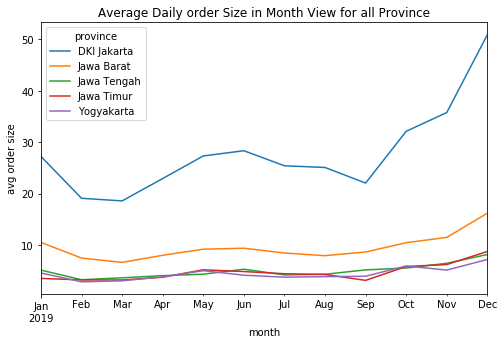

In [74]:
import matplotlib.pyplot as plt

# Plot untuk hasil resampling
by_order_monthly_mean.plot(
   figsize = (8,5),
   title = 'Average Daily order Size in Month View for all Province'
)
plt.ylabel('avg order size')
plt.xlabel('month')
plt.show()

Langah 7 s/d 9 yang telah dilakukan baru untuk satu measurement yaitu order. Berarti ada empat kali lagi kode seperti ini harus dibuat. Karena struktur code masih sama, dapat menggunakan perulangan sesuai dengan jumlah measurement yaitu 5, sehingga kelima measurement dapat ditampilkan grafiknya dalam satu canvas figure.

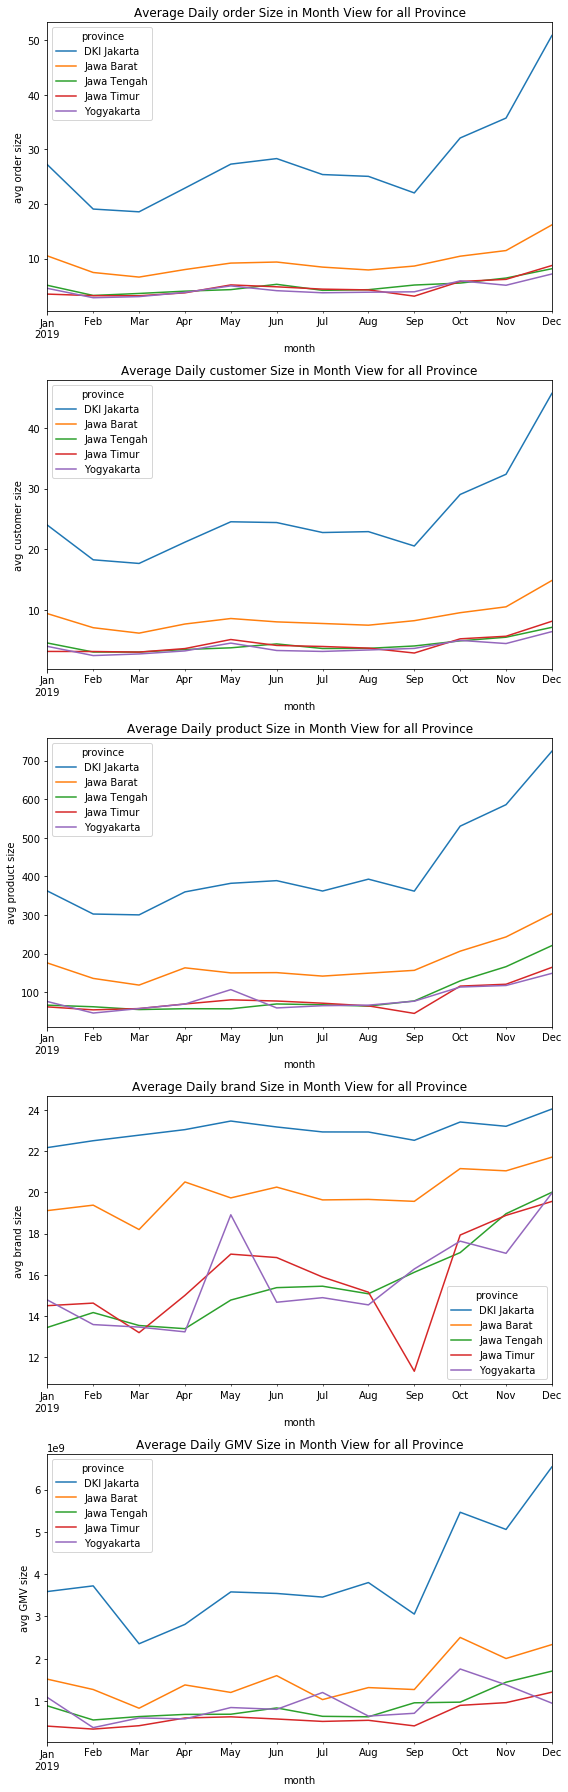

In [80]:
# Create figure canvas dan axes for 5 line plots
fig, axes = plt.subplots(5, 1, figsize=(8, 25))

# Slicing index
idx = pd.IndexSlice
for i, measurement in enumerate(groupby_city_province.columns):
    # Slicing data untuk masing-masing measurement
    by_measurement = unstack_city_province.loc[:,idx[measurement]]
    # Lakukan resampling pada data tersebut untuk dilakukan perhitungan rata-rata bulanan 
    by_measurement_monthly_mean = by_measurement.resample('M').mean()
    # Plot by_measurement_monthly_mean
    by_measurement_monthly_mean.plot(
        title = 'Average Daily ' + measurement + ' Size in Month View for all Province',
        ax = axes[i]
    )
    axes[i].set_ylabel('avg ' + measurement + ' size')
    axes[i].set_xlabel('month')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()